In [1]:
import os
import os.path
import numpy as np
import json
import matplotlib
import matplotlib.pyplot as plt

folderPath ='/mnt/DeepLearning/hand/hand143_panopticdb/' #Put your local path here
jsonPath = folderPath +'hands_v143_14817.json'

plt.rcParams['figure.figsize'] = (20,20)
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

In [2]:
with open(jsonPath, 'r') as fid:
    dat_all = json.load(fid)
    data_all= dat_all['root']

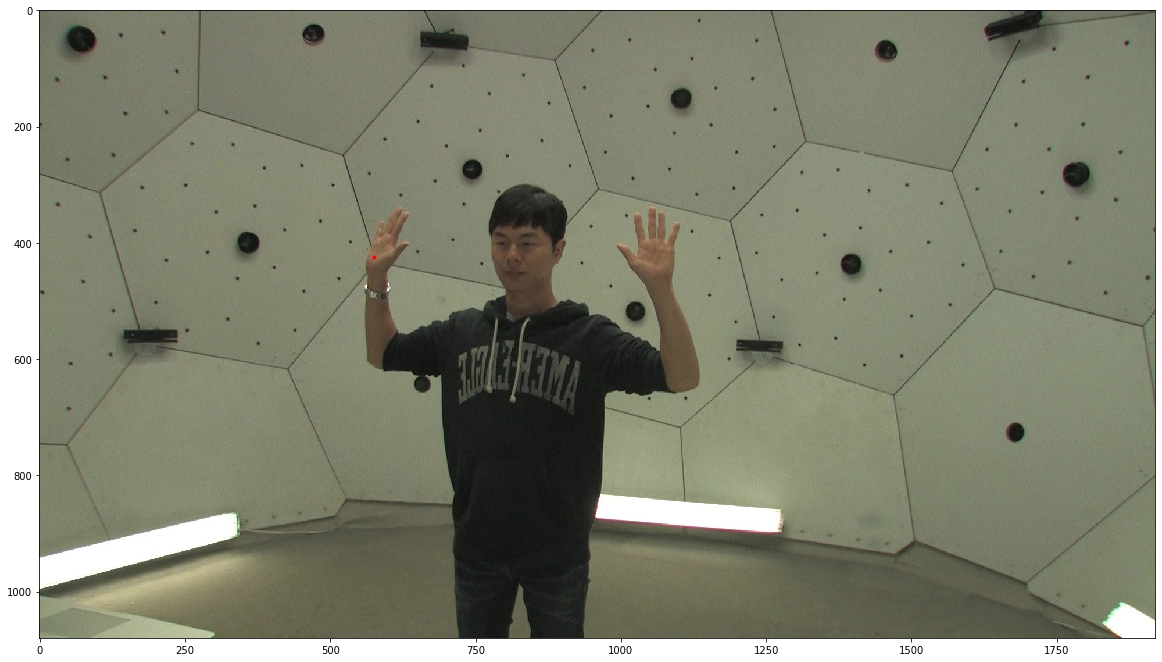

In [3]:
# Example 
data = data_all[1]
imgPath = folderPath + data['img_paths'];
plt.clf()
im = plt.imread(imgPath)
plt.plot(data_all[0]['objpos'][0], data_all[0]['objpos'][1],'r.')
plt.imshow(im)

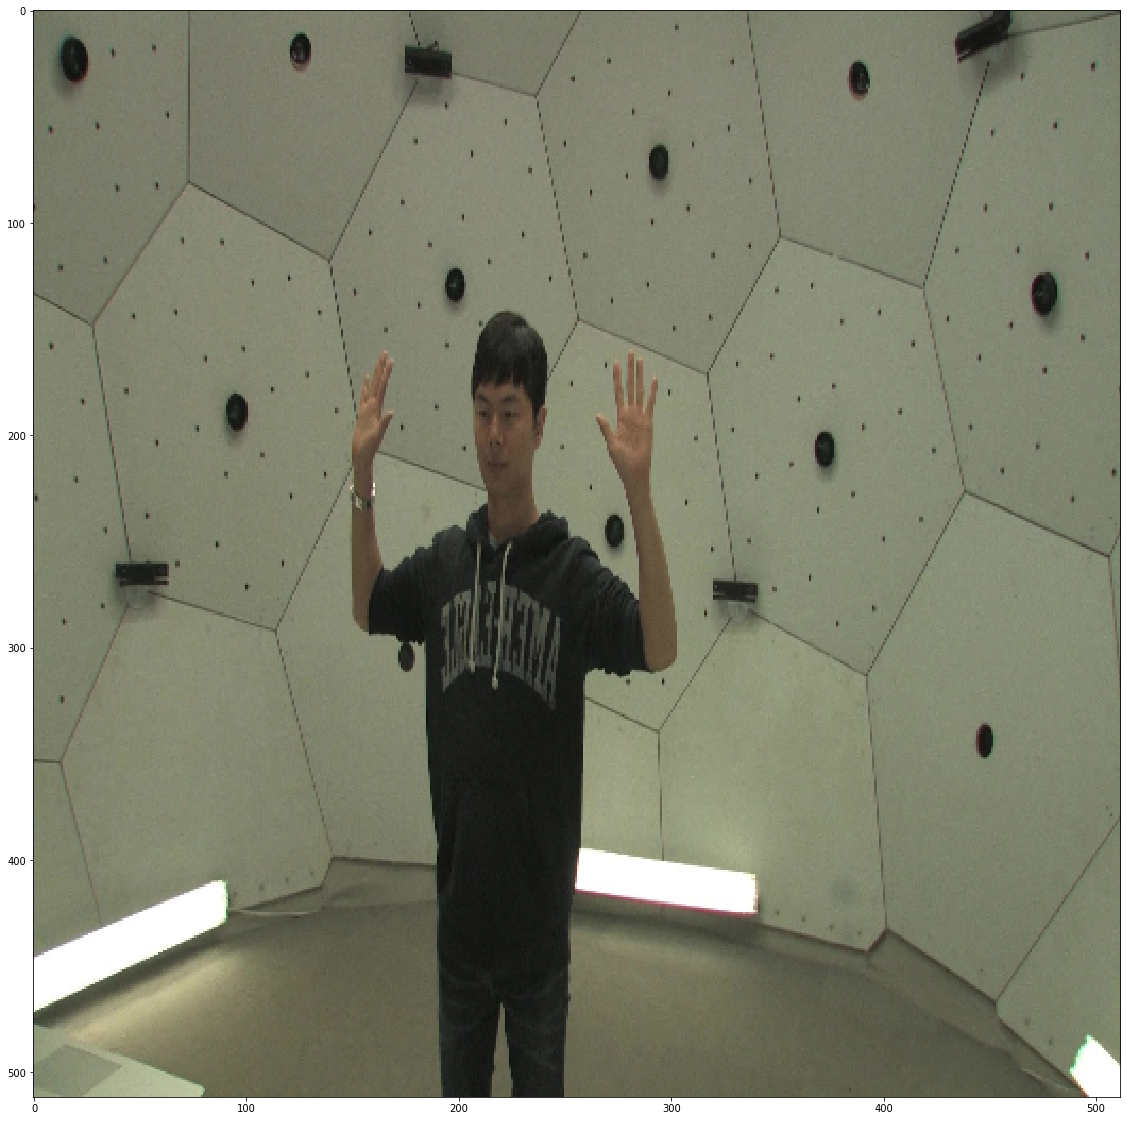

In [4]:
# Đây là input sau khi được resize và có lỗi 
import cv2
im = cv2.resize(im,(512,512))
plt.imshow(im)

True

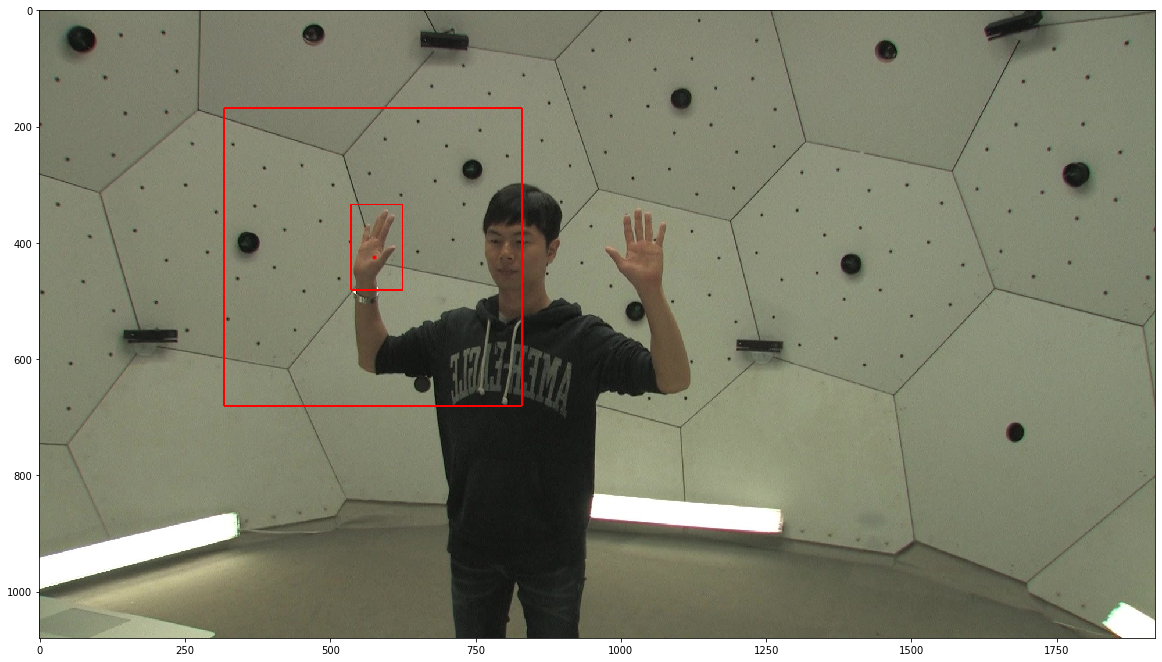

In [5]:
# Example reload the image 
example = data_all[0]
imgPath = folderPath + example['img_paths'];
plt.clf()
img = plt.imread(imgPath)
plt.imshow(img)

# Vẽ tọa độ point center của hand 
plt.plot(example['objpos'][0], example['objpos'][1],'r.')

# Tạo ra ROI có tay ở trung tâm 
xmin_ROI = example['objpos'][0] - 256
ymin_ROI = example['objpos'][1] - 256

xmax_ROI = example['objpos'][0] + 256
ymax_ROI = example['objpos'][1] + 256

width =  xmax_ROI - xmin_ROI
height = ymax_ROI - ymin_ROI

# Vẽ ROI 
cv2.rectangle(img, (int(xmin_ROI), int(ymin_ROI)), (int(xmax_ROI), int(ymax_ROI)), color=(255, 0, 0), thickness =2)
plt.rcParams['figure.figsize'] = (20,20)
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'


# Vẽ Bbox hand 
x_list = [item[0] for item in example['joint_self']]
y_list = [item[1] for item in example['joint_self']]
    
x_min = min(x_list) - 25
y_min = min(y_list) - 15
x_max = max(x_list) + 15
y_max = max(y_list) + 20

cv2.rectangle(img, (int(x_min), int(y_min)), (int(x_max), int(y_max)), color=(255, 0, 0), thickness =2)
plt.imshow(img)

# Cắt ROI và lưu file 
img = cv2.imread(imgPath)
roi = img[int(ymin_ROI):int(ymax_ROI), int(xmin_ROI):int(xmax_ROI),:]
cv2.imwrite("example.png", roi)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


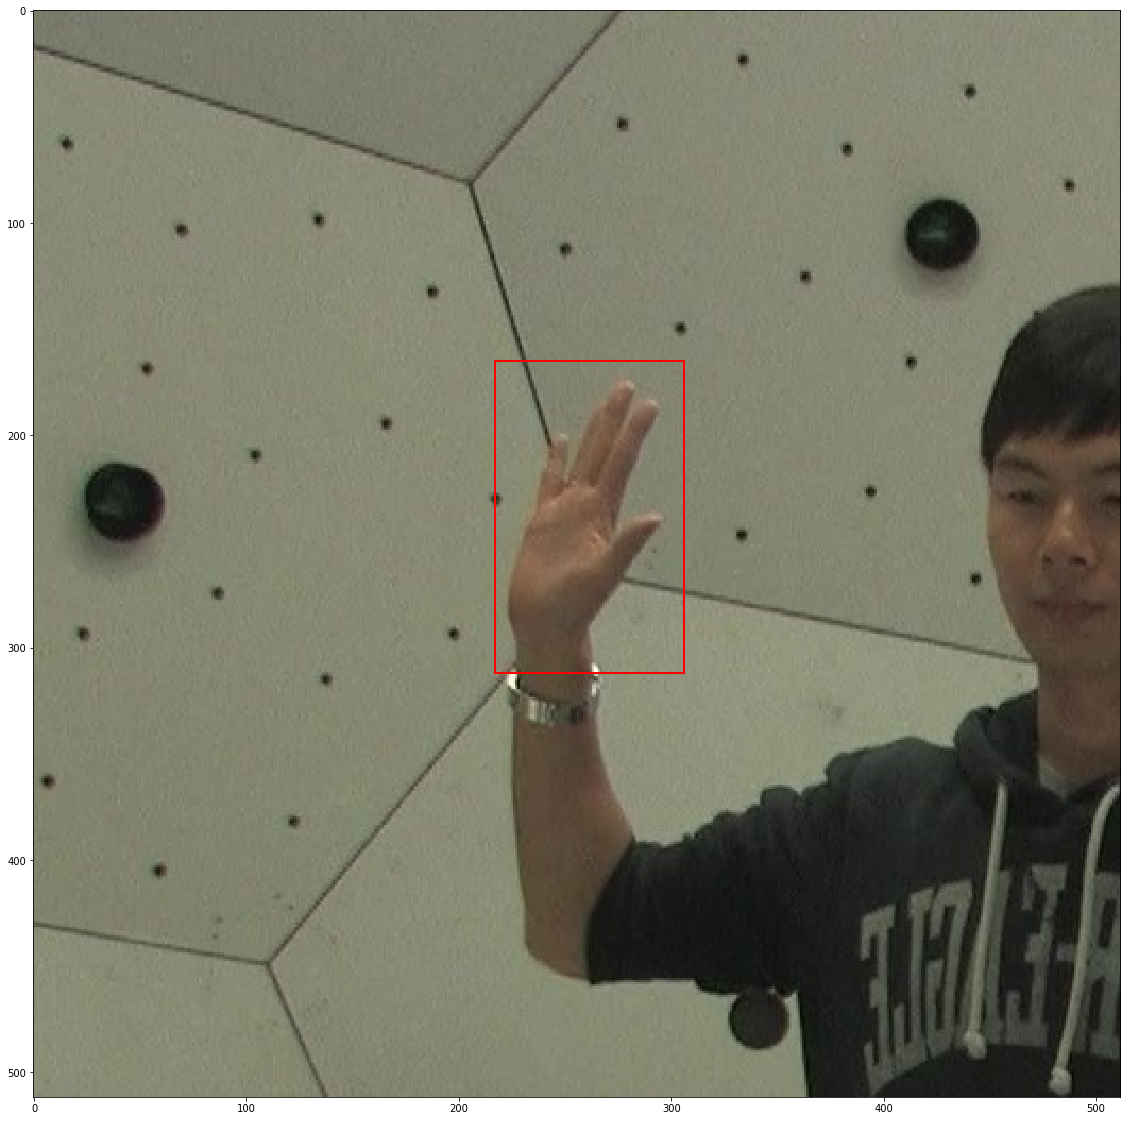

In [6]:
# Transform the bbox 
img_ROI = plt.imread("example.png")


xmin_ROI_bbox = x_min - xmin_ROI 
ymin_ROI_bbox = y_min - ymin_ROI

# Caculate distance from xmin -> xmax
xmax_ROI_bbox = 512 - (xmax_ROI - x_max)
ymax_ROI_bbox = 512 - ( ymax_ROI - y_max)

cv2.rectangle(img_ROI, (int(xmin_ROI_bbox), int(ymin_ROI_bbox)), (int(xmax_ROI_bbox), int(ymax_ROI_bbox)), color=(255, 0, 0), thickness =1)
plt.imshow(img_ROI)

# Một số trường hợp lỗi 

In [13]:
for data in data_all: 
    if "imgs/00000178_512.jpg" in data['img_paths']:
        filename = data['img_paths']
        x_center = data['objpos'][0]
        y_center = data['objpos'][1]
        print(done)
        break
        
plt.clf()
im = plt.imread(filename)
plt.plot(x_center, y_center,'r.')
plt.imshow(im)

NameError: name 'filename' is not defined

<Figure size 1440x1440 with 0 Axes>